In [1]:
import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
import cv2

In [2]:
D = "F:/Apple/Data1/images"

In [3]:
train = pd.read_csv("F:/Apple/Data1/train.csv")

In [4]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [5]:
test = pd.read_csv("F:/Apple/Data1/test.csv")

In [6]:
test.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


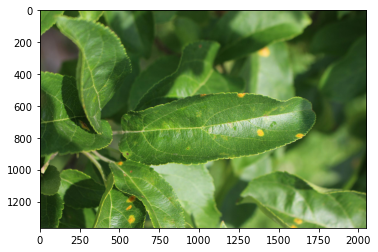

In [7]:
image1 = Image.open("F:/Apple/Data1/images/Test_0.jpg")
plt.imshow(image1)
plt.show()

In [8]:
class_names = train.loc[:, 'healthy':].columns
print(class_names)

Index(['healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')


In [9]:
number=0
train['label']=0
for i in class_names:
    train['label']=train['label']+train[i]*number
    number+=1

In [10]:
img = 'Train_03.jpg'
img.split('.')
i = img.split('.')[0]
i

'Train_03'

In [11]:
sorted(os.listdir(D))

natsort.natsorted(os.listdir(D))

['Test',
 'Test_0.jpg',
 'Test_1.jpg',
 'Test_2.jpg',
 'Test_3.jpg',
 'Test_4.jpg',
 'Test_5.jpg',
 'Test_6.jpg',
 'Test_7.jpg',
 'Test_8.jpg',
 'Test_9.jpg',
 'Test_10.jpg',
 'Test_11.jpg',
 'Test_12.jpg',
 'Test_13.jpg',
 'Test_14.jpg',
 'Test_15.jpg',
 'Test_16.jpg',
 'Test_17.jpg',
 'Test_18.jpg',
 'Test_19.jpg',
 'Test_20.jpg',
 'Test_21.jpg',
 'Test_22.jpg',
 'Test_23.jpg',
 'Test_24.jpg',
 'Test_25.jpg',
 'Test_26.jpg',
 'Test_27.jpg',
 'Test_28.jpg',
 'Test_29.jpg',
 'Test_30.jpg',
 'Test_31.jpg',
 'Test_32.jpg',
 'Test_33.jpg',
 'Test_34.jpg',
 'Test_35.jpg',
 'Test_36.jpg',
 'Test_37.jpg',
 'Test_38.jpg',
 'Test_39.jpg',
 'Test_40.jpg',
 'Test_41.jpg',
 'Test_42.jpg',
 'Test_43.jpg',
 'Test_44.jpg',
 'Test_45.jpg',
 'Test_46.jpg',
 'Test_47.jpg',
 'Test_48.jpg',
 'Test_49.jpg',
 'Test_50.jpg',
 'Test_51.jpg',
 'Test_52.jpg',
 'Test_53.jpg',
 'Test_54.jpg',
 'Test_55.jpg',
 'Test_56.jpg',
 'Test_57.jpg',
 'Test_58.jpg',
 'Test_59.jpg',
 'Test_60.jpg',
 'Test_61.jpg',
 'Test_62

In [12]:
D

'F:/Apple/Data1/images'

In [13]:
def get_label_img(img):
    if search('Train', img):
        img=img.split('.')[0]
        label=train.loc[train['image_id']==img]['label']
        return label

In [14]:
def create_train_data():
    images=natsort.natsorted(os.listdir(D))
    for img in tqdm(images):
        label=get_label_img(img)
        path=os.path.join(D,img)
        if search('Train', img):
            if(img.split('_')[1].split('.')[0] and label.item()==0):
                shutil.copy(path, r'F:/Apple/Data1/image/train/healthy')
            elif(img.split('_')[1].split('.')[0] and label.item()==1):
                shutil.copy(path, r'F:/Apple/Data1/image/train/multiple_disease')
            elif(img.split('_')[1].split('.')[0] and label.item()==2):
                shutil.copy(path, r'F:/Apple/Data1/image/train/rust')
            elif(img.split('_')[1].split('.')[0] and label.item()==3):
                shutil.copy(path, r'F:/Apple/Data1/image/train/scab')
        elif(search('Test', img)):
            shutil.copy(path, r'F:/Apple/Data1/image/test')

In [15]:
shutil.os.mkdir(r'F:/Apple/Data1/image/train')
shutil.os.mkdir(r'F:/Apple/Data1/image/train/healthy')
shutil.os.mkdir(r'F:/Apple/Data1/image/train/multiple_disease')
shutil.os.mkdir(r'F:/Apple/Data1/image/train/rust')
shutil.os.mkdir(r'F:/Apple/Data1/image/train/scab')
shutil.os.mkdir(r'F:/Apple/Data1/image/test')

In [16]:
train_dir=create_train_data()

100%|█████████████████████████████████████████████████████████████████████████████| 3643/3643 [00:13<00:00, 277.37it/s]


In [17]:
train_D='F:/Apple/Data1/image/train'
train_D

'F:/Apple/Data1/image/train'

In [18]:
Categories=['healthy','multiple_disease','rust','scab']

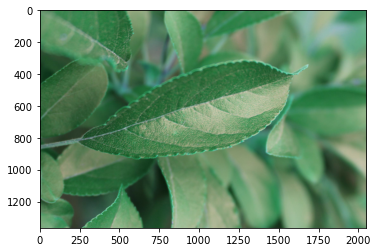

In [19]:
for j in Categories:
    path=os.path.join(train_D,j)#combing the path we categorized ,take all images at once 
    for img in os.listdir(path):
        old_img=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(old_img)
        plt.show()
        break
    break

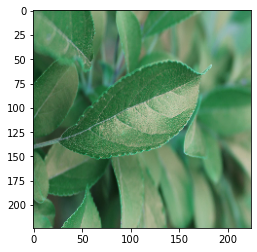

In [20]:
IMG_SIZE=224
new_img=cv2.resize(old_img,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_img)
plt.show()

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.layers import Dense,Activation,Flatten,Conv2D,MaxPooling2D 
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [22]:
tf.config.list_physical_devices('GPU')

[]

In [23]:
datagen = ImageDataGenerator(rescale=1./255,
                          shear_range=0.2,
                          zoom_range=0.2,
                          horizontal_flip=True,
                          vertical_flip=True,
                          validation_split=0.2)
train_datagen = datagen.flow_from_directory('F:/Apple/Data1/image/train', target_size=(IMG_SIZE,IMG_SIZE),
                                           batch_size=16,
                                           class_mode='categorical',
                                           subset='training'
                                           )
val_datagen = datagen.flow_from_directory('F:/Apple/Data1/image/train', target_size=(IMG_SIZE,IMG_SIZE),
                                          batch_size=16,
                                          class_mode='categorical',
                                          subset='validation'
                                       )

Found 1458 images belonging to 4 classes.
Found 363 images belonging to 4 classes.


In [24]:
model=Sequential()# similar to VGG16 but custom build
# 3,3 is the pipeline of the model RGB it holds ,for Grey it's 1,1
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))  #with padding adds Zeros to the pixels of matrix and make it strong enough to hold no in each matrix
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))
# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),# lower the learning rate the more the effeciency
             loss='categorical_crossentropy',
             metrics=['accuracy'])# optimizer used reduce the loss and increase the effenciency compared to others adam is the best
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       7

In [25]:
checkpoint=ModelCheckpoint('F:/Apple/Data1/model/apple1.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1) #font size-verbose
earlystop=EarlyStopping(monitor='val_loss',
                        min_delta=0,
                        patience=10,
                        verbose=1,
                        restore_best_weights=True)
#early stop used when acc not increasing,effeciency not decreasing for given 10 epoch
callbacks=[checkpoint,earlystop]

In [26]:
model_history=model.fit(train_datagen,
                                 validation_data=val_datagen,
                                 epochs=30,
                                 steps_per_epoch=train_datagen.samples//16,
                                 validation_steps=val_datagen.samples//16,
                                callbacks=callbacks)

Epoch 1/30
91/91 [==============================] - ETA: 0s - loss: 1.2635 - accuracy: 0.3287
Epoch 00001: val_loss improved from inf to 1.23063, saving model to F:/Apple/Data1/model\apple1.h5
91/91 [==============================] - 195s 2s/step - loss: 1.2635 - accuracy: 0.3287 - val_loss: 1.2306 - val_accuracy: 0.2898
Epoch 2/30
91/91 [==============================] - ETA: 0s - loss: 1.2397 - accuracy: 0.3627
Epoch 00002: val_loss did not improve from 1.23063
91/91 [==============================] - 188s 2s/step - loss: 1.2397 - accuracy: 0.3627 - val_loss: 1.2523 - val_accuracy: 0.3750
Epoch 3/30
91/91 [==============================] - ETA: 0s - loss: 1.2313 - accuracy: 0.3981
Epoch 00003: val_loss improved from 1.23063 to 1.20731, saving model to F:/Apple/Data1/model\apple1.h5
91/91 [==============================] - 231s 3s/step - loss: 1.2313 - accuracy: 0.3981 - val_loss: 1.2073 - val_accuracy: 0.4148
Epoch 4/30
91/91 [==============================] - ETA: 0s - loss: 1.1016 

91/91 [==============================] - ETA: 0s - loss: 0.2276 - accuracy: 0.9293
Epoch 00027: val_loss did not improve from 0.24700
91/91 [==============================] - 181s 2s/step - loss: 0.2276 - accuracy: 0.9293 - val_loss: 0.2623 - val_accuracy: 0.8920
Epoch 28/30
91/91 [==============================] - ETA: 0s - loss: 0.2408 - accuracy: 0.9161
Epoch 00028: val_loss did not improve from 0.24700
91/91 [==============================] - 183s 2s/step - loss: 0.2408 - accuracy: 0.9161 - val_loss: 0.2893 - val_accuracy: 0.9119
Epoch 29/30
91/91 [==============================] - ETA: 0s - loss: 0.1864 - accuracy: 0.9376
Epoch 00029: val_loss improved from 0.24700 to 0.20738, saving model to F:/Apple/Data1/model\apple1.h5
91/91 [==============================] - 199s 2s/step - loss: 0.1864 - accuracy: 0.9376 - val_loss: 0.2074 - val_accuracy: 0.9261
Epoch 30/30
91/91 [==============================] - ETA: 0s - loss: 0.1837 - accuracy: 0.9355
Epoch 00030: val_loss did not improve

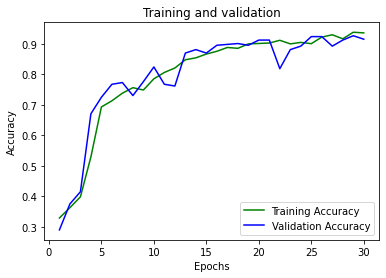

In [32]:
acc_train=model_history.history['accuracy']
acc_val=model_history.history['val_accuracy']
epochs=range(1,31)
plt.plot(epochs,acc_train,'g',label='Training Accuracy')
plt.plot(epochs,acc_val,'b',label='Validation Accuracy')
plt.title("Training and validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

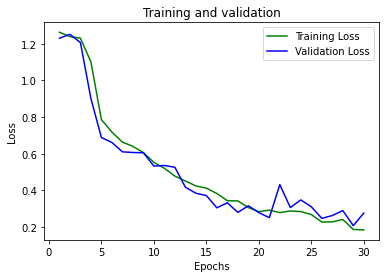

In [33]:
loss_train=model_history.history['loss']
loss_val=model_history.history['val_loss']
epochs=range(1,31)
plt.plot(epochs,loss_train,'g',label='Training Loss')
plt.plot(epochs,loss_val,'b',label='Validation Loss')
plt.title("Training and validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

[[9.8900551e-01 2.2788932e-04 2.0346150e-03 8.7320423e-03]]


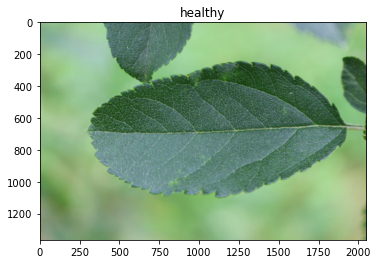

In [29]:
tes_img= 'F:/Apple/Data1/image/test/Test_3.jpg'
image_result=Image.open(tes_img)
from tensorflow.keras.preprocessing import image

test_img=image.load_img(tes_img,target_size=(224,224))

test_img=image.img_to_array(test_img)
test_img=test_img/225
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
print(result)# probability of accuracy
categories=['healthy','multiple_diseases','rust','scab']
#categories[np.argmax(result)]

image_result=plt.imshow(image_result)
plt.title(categories[np.argmax(result)])
plt.show()